<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Experiments" data-toc-modified-id="Experiments-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Experiments</a></span></li><li><span><a href="#Deliverables" data-toc-modified-id="Deliverables-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Deliverables</a></span></li></ul></li><li><span><a href="#Code" data-toc-modified-id="Code-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Code</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Replace-with-Mode" data-toc-modified-id="Replace-with-Mode-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Replace with Mode</a></span></li></ul></li><li><span><a href="#Remove-'-?'-in-workclass,-occupation,-native-country" data-toc-modified-id="Remove-'-?'-in-workclass,-occupation,-native-country-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Remove ' ?' in workclass, occupation, native-country</a></span></li><li><span><a href="#Convert-Discrete-to-OneHot" data-toc-modified-id="Convert-Discrete-to-OneHot-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Convert Discrete to OneHot</a></span></li><li><span><a href="#KNN-Classifiers" data-toc-modified-id="KNN-Classifiers-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>KNN Classifiers</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li></ul></li></ul></div>

In [1]:
!git clone https://github.com/jithendaraa/comp551-p1

Cloning into 'comp551-p1'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 44 (delta 13), reused 17 (delta 4), pack-reused 0
Unpacking objects: 100% (44/44), done.


In [2]:
%cd comp551-p1/

/content/comp551-p1


## Preprocessing
Your first task is to acquire the data, analyze it, and clean it (if necessary).  You will use two datasets in this project,outlined below.
• Dataset 1 (Adult dataset): This dataset presents several attributes of different individuals and the predictiontask is to determine whether someone makes over 50K a year.  Download and read information about the datasethere.

The essential subtasks for this part of the project include:

1.  Download the datasets.Hints: For clarity, in the Adult dataset, adult.data contains the training/validation dataand adult.test contains the test data.
2.  Load the datasets into Pandas dataframes or NumPy objects (i.e., arrays or matrices) in Python.
3.  Clean the data.  You should remove instances that have too many missing or invalid data entries.
4.  Convert discrete variables into multiple variables using one-hot encoding.  For an example on how to do this,check out ”Encoding categorical features” in the scikit-learn documentation.

## Experiments
In this part, you will compare two supervised learning frameworks, namelyK-nearest neighbours(KNN) anddecisiontrees,  to predict whether the income of an adult exceeds $50K/yr.  A similar analysis should be performed for thesecond dataset.  The specific subtasks for this part include:
1.  Implement and perform 5-fold cross validation on the training/validation data (for theAdultdataset, this datais contained in theadult.datafile) to optimize hyperparameters for both models.Your implementation forcross-validation should be from scratch.  You should not use existing packages for cross validation.Report the mean of the training and validation metrics for the given hyperparameters.
2.  Sample growing subsets of the training/validation data and repeat step 1.  We want to understand how the sizeof a dataset impacts both the training and validation error.
3.  Take the best performing model (the one with the best performance on 5-fold cross validation) and apply it onthe test set (in theAdultdataset, this is theadult.testfile).  This is an unbiased estimate of how your modelwould perform on new/unseen data.
4.  [Optional] Go above and beyond!  Examples:  different normalization techniques or other ways of handling of missing data (search “data imputation” techniques).  Employ more sophisticated techniques for hyper-parameter search.  Engineering new features out of existing ones to get a better performance.  Investigate which featuresare the most useful (e.g., by correlating them with your predictions or removing them from your data)?
5.  Analyze your findings; how did the choice of the various hyper-parameters impact generalization?  How aboutthe size of training data?  If any of these findings do not agree with your expectation, you can form hypothesesand further investigate them.

## Deliverables
You must submit two separate files to MyCourses(using the exact filenames and file types outlined below):

1. code.zip:  Your  entire  code,  which  should  consist  of  a  jupyter  notebook  file  (.ipynb),  and  additional  pythonfiles (.py);the notebook should contain the main body of your code, where we can see and easily reproduce the plots in your report.
2. writeup.pdf:  Your (max three pages) project write-up as a pdf (details below).

# Code

1. Download the datasets.Hints: For clarity, in the Adult dataset, adult.data contains the training/validation data and adult.test contains the test data.

In [42]:
#from utils import *
from tqdm.auto import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import time
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from random import randrange
from random import seed
seed(1)
# Vars
data_rootdir = 'Adult dataset'
remove_dup = True

In [ ]:
# TODO Put in .py


rootdir = 'Adult dataset'

adult_names = ["age",
"workclass",
"fnlwgt",
"education",
"education-num",
"marital-status",
"occupation",
"relationship",
"race",
"sex",
"capital-gain",
"capital-loss",
"hours-per-week",
"native-country"]

def load_adult(rootdir=rootdir, split='train'):
    csv_name = 'adult.data' if split == 'train' else 'adult.test'
    csv_path = os.path.join(rootdir, csv_name)
    assert os.path.exists(csv_path)
    adult_data = pd.read_csv(csv_path, names=adult_names + ['salary'], index_col=False)
    return adult_data

def get_faulty_col_names(df):
    faulty_cols = []
    
#     Check NA values
    for col_name in df.columns.tolist():
        if df[col_name].isna().values.any() is True:
            faulty_cols.append(col_name)

#     Check for ' ?'
        if ' ?' in df[col_name].unique().tolist():
            if col_name not in faulty_cols:
                faulty_cols.append(col_name)
            print(f"Number of ' ?' in {col_name}: {df[col_name].value_counts()[' ?']}")
    
    return faulty_cols

def replace_with_mode(df, faulty_cols):
    
    df_without_QM = df.copy()
    for col in faulty_cols:
        df_without_QM = df_without_QM[getattr(df, col) != ' ?']
    
    r_df = df.copy()
    mapping = {}
    for col in faulty_cols:
        mapping[col] = df_without_QM[col].mode().values[0]
        r_df[col] = r_df[col].replace(' ?', mapping[col])
    return r_df, mapping

def replace_with_mapping(df, faulty_cols, mapping):
    r_df = df.copy()
    for col in faulty_cols:
        r_df[col] = r_df[col].replace(' ?', mapping[col])
    return r_df

def get_binary_labels_for_salary(df):
    if isinstance(df, pd.Series):
        df = df.to_frame()
    assert isinstance(df, pd.DataFrame)
    salary_map = {' <=50K': 0, ' <=50K.': 0, ' >50K': 1, ' >50K.': 1}
    df['salary'] = df['salary'].map(salary_map)
    
    return df['salary'].tolist()

def generate_cross_validation(n_folds, X, y):
    samples = len(X)
    elements_in_fold = samples // n_folds
    indices = [0]
    while indices[-1] + elements_in_fold <= samples - samples % n_folds:
        indices.append(indices[-1] + elements_in_fold)
    indices[-1] = samples
    cross_val_sets = [[indices[i], indices[i+1]] for i in range(len(indices)-1)]
    for val_set in cross_val_sets:
        begin, end = val_set[0], val_set[1]
        train_X_fold = X[0:begin].append(X[end:])
        validation_X_fold = X[begin:end]
        train_y_fold = y[0:begin] + y[end:]
        validation_y_fold = y[begin:end]
        yield train_X_fold, train_y_fold, validation_X_fold, validation_y_fold

def knn_fit(X_train, y_train, X_val, y_val, one_hot, knn=3):
    neigh = KNeighborsClassifier(n_neighbors=knn)
    neigh.fit(one_hot.transform(X_train), y_train)
    pred_y = neigh.predict(OH_enc.transform(X_val))
    acc = get_accuracy(y_val, pred_y)
    return neigh, acc

def eval_classifier(X, y, one_hot, classifier):
    pred_y = classifier.predict(one_hot.transform(X))
    acc = get_accuracy(y, pred_y)
    return acc

def fit_classifier(X_train, y_train, X_val, y_val, one_hot, classifier_model, **kwargs):
    classifier = classifier_model(**kwargs)
    classifier.fit(one_hot.transform(X_train), y_train)
    acc = eval_classifier(X_val, y_val, one_hot, classifier)
    return classifier, acc

def get_accuracy(y_label, y_pred):
    assert len(y_label) == len(y_pred)
    acc = 100 * sum(y_label == y_pred) / len(y_label)
    return acc

2. Load the datasets into Pandas dataframes or NumPy objects (i.e., arrays or matrices) in Python.

In [ ]:
df = load_adult(data_rootdir)

if remove_dup is True:
    df = df.drop_duplicates()

# Get faulty columns in the df - ones with na values or ' :?' values
faulty_cols = get_faulty_col_names(df)
print(faulty_cols)
df.head()

Number of ' ?' in workclass: 1836
Number of ' ?' in occupation: 1843
Number of ' ?' in native-country: 582
['workclass', 'occupation', 'native-country']


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Faulty columns can be: 
1. Replaced with mode
2. KNN imputed
3. Retained

### Replace with Mode

In [ ]:
clean_train_df, faulty_col_modes = replace_with_mode(df, faulty_cols)
assert get_faulty_col_names(clean_train_df) == []

c:\users\asus\anaconda3\envs\dreamerv2\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [ ]:
df_without_QM = df.copy()
for col in faulty_cols:
    df_without_QM = df_without_QM[getattr(df, col) != ' ?']

mapping = {}
for col in faulty_cols:
    mapping[col] = df_without_QM[col].mode().values[0]

clean_train_df = replace_with_mapping(df, faulty_cols, mapping)
assert get_faulty_col_names(clean_train_df) == []
print(len(clean_train_df))

c:\users\asus\anaconda3\envs\dreamerv2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


32537


## Remove ' ?' in workclass, occupation, native-country

In [ ]:
# df = adult_data
# print(len(df))
# for col_name in col_names_with_nan:
#     df = df[getattr(df, col_name) != ' ?']
# print(len(df))

In [ ]:
# df.hist(figsize=(16, 16), bins=100)

In [ ]:
# df['native-country'].value_counts().index
# # df['native-country'].unique()

In [ ]:
# cat_cols = adult_data.select_dtypes(include=['object']).columns.tolist()
# n = len(cat_cols)
# ncols = 3
# nrows = (n // ncols + 1) if n % ncols != 0 else (n // ncols)
# plt.figure(figsize=(16 * nrows, 8 * ncols))
# for idx, col in enumerate(cat_cols):
# #     print(idx)
# #     print(cat_cols)
#     plt.subplot(nrows, ncols, idx  + 1)
#     plt.grid()
#     plt.bar(adult_data[col].value_counts().index, adult_data[col].value_counts().values)
#     plt.title(col)
# plt.tight_layout()
# plt.show()

In [ ]:
# cat_cols = df.select_dtypes(include=['object']).columns.tolist()
# n = len(cat_cols)
# ncols = 4
# plt.figure(figsize=(16 * n // ncols, 4 * ncols))
# for idx, col in enumerate(cat_cols):
#     plt.subplot(n // ncols, ncols, idx  + 1)
#     plt.bar( df[col].value_counts().index, df[col].value_counts().values)
#     plt.title(col)
#     plt.grid()
#     # if idx >= 3: break
# plt.tight_layout()
# plt.show()

## Convert Discrete to OneHot

In [ ]:
X_train, y_train = clean_train_df.drop('salary', axis=1), get_binary_labels_for_salary(clean_train_df['salary'])

In [ ]:
# Get categorical variables
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
print("Discrete Variables: ", cat_cols)

Discrete Variables:  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
OH_enc = OneHotEncoder(handle_unknown='ignore')
OH_enc.fit(X_train)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [ ]:
test_df = load_adult(data_rootdir, 'test')
print("Before cleaning: ", len(test_df))
faulty_test_cols = get_faulty_col_names(test_df)
print("Columns to clean", faulty_test_cols)

clean_test_df = replace_with_mapping(test_df, faulty_test_cols, mapping)
assert get_faulty_col_names(clean_test_df) == []
print("After cleaning: ", len(clean_test_df))

Before cleaning:  16281
Number of ' ?' in workclass: 963
Number of ' ?' in occupation: 966
Number of ' ?' in native-country: 274
Columns to clean ['workclass', 'occupation', 'native-country']
After cleaning:  16281


In [ ]:
X_test, y_test = clean_test_df.drop('salary', axis=1), get_binary_labels_for_salary(clean_test_df['salary'])

## KNN Classifiers

Hyperparameters
- `n_neighbors` : [2:10:2]
- `p`: [1:2:1]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=3
knn_kw = {
    'n_neighbors': n_neighbors,
}
neigh = KNeighborsClassifier(**knn_kw)
neigh.fit(OH_enc.transform(X_train), y_train)

print("Train Accuracy: ", eval_classifier(X_train, y_train, OH_enc, neigh))
print("Test Accuracy: ", eval_classifier(X_test, y_test, OH_enc, neigh))

In [ ]:
from tqdm.auto import tqdm
n_folds = 5
models = []
accs = []
for batch in tqdm(generate_cross_validation(n_folds, X_train, y_train), total=n_folds):
    cross_X_train, cross_y_train, cross_X_val, cross_y_val = batch
    model, acc = fit_classifier(cross_X_train, cross_y_train, cross_X_val, cross_y_val, OH_enc, KNeighborsClassifier, **knn_kw)
    models.append(model)
    accs.append(acc)

print(accs)
print(f"Model accuracy averaged across {n_folds} folds: {np.mean(accs)}")

## DecisionTreeClassifier

Hyperparameters
- `criterion`: ['gini', 'entropy']
- `max_depth`: [5:20:5]
- `min_samples_split`: [2:6:2]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
criterion='entropy'
max_depth=10
dt_kw = {
    'criterion': criterion,
    'max_depth': max_depth,
}
classifier = DecisionTreeClassifier(**dt_kw)
classifier.fit(OH_enc.transform(X_train), y_train)

print("Train Accuracy: ", eval_classifier(X_train, y_train, OH_enc, classifier))
print("Test Accuracy: ", eval_classifier(X_test, y_test, OH_enc, classifier))

In [ ]:
from tqdm.auto import tqdm
n_folds = 5
models = []
accs = []
for batch in tqdm(generate_cross_validation(n_folds, X_train, y_train), total=n_folds):
    cross_X_train, cross_y_train, cross_X_val, cross_y_val = batch
    model, acc = fit_classifier(cross_X_train, cross_y_train, cross_X_val, cross_y_val, OH_enc, DecisionTreeClassifier, **dt_kw)
    models.append(model)
    accs.append(acc)

print(accs)
print(f"Model accuracy averaged across {n_folds} folds: {np.mean(accs)}")

## Helper functions

In [23]:
rootdir = 'occupancy_dataset'


def load_occupancy(rootdir=rootdir, split='train'):
    csv_name = 'datatraining.txt' if split == 'train' else 'datatest.txt'
    csv_path = os.path.join(rootdir, csv_name)
    assert os.path.exists(csv_path)
    occupancy_data= pd.read_csv(csv_path)
    return occupancy_data



def convert_to_timestamp(x):
    """Convert date objects to integers"""
    return time.mktime(x.timetuple())


def normalize(df):
    """Normalize the DF using min/max"""
    scaler = MinMaxScaler(feature_range=(-1, 1))
    dates_scaled = scaler.fit_transform(df[['date']])

    return dates_scaled

def splitter(dataset, folds):
        dataset_split = []
        df_copy = dataset
        fold_size = int(df_copy.shape[0] / folds)
        for i in range(folds):
            fold = []
            while len(fold) < fold_size:
                r = randrange(df_copy.shape[0])
                index = df_copy.index[r]
                fold.append(df_copy.loc[index].values.tolist())
                df_copy = df_copy.drop(index)
            dataset_split.append(np.asarray(fold))   
        return dataset_split 


def kfold(X, n_folds):

    X = splitter(X, n_folds)
    for i in range(n_folds):
        data = []
        for j in range(n_folds):
            if j==i:
                continue
            data.append(np.asarray(X[j]))

        data = np.asarray(data)
        data = data.reshape(data.shape[0]*data.shape[1],data.shape[2])
        df_train = pd.DataFrame(data, columns = occupancy_data.columns.values)
        df_val= pd.DataFrame(X[i], columns = occupancy_data.columns.values)

        label = df_train.columns[-1]

        F_X_train = df_train.drop(label, axis = 1)
        F_y_train = df_train[label]
        F_X_val = df_val.drop(label, axis = 1)
        F_y_val = df_val[label]

        yield F_X_train, F_y_train, F_X_val, F_y_val


def eval_classifier(X, y, one_hot, classifier):
    pred_y = classifier.predict(one_hot.transform(X))
    acc = get_accuracy(y, pred_y)
    return acc

def fit_classifier(X_train, y_train, X_val, y_val, one_hot, classifier_model, **kwargs):
    OH_enc.fit(X_train)
    classifier = classifier_model(**kwargs)
    classifier.fit(one_hot.transform(X_train), y_train)
    acc_train= eval_classifier(X_train, y_train, one_hot, classifier)
    acc_val= eval_classifier(X_val, y_val, one_hot, classifier)
    return classifier, acc_train, acc_val

def get_accuracy(y_label, y_pred):
    assert len(y_label) == len(y_pred)
    acc = 100 * sum(y_label == y_pred) / len(y_label)
    return acc




In [5]:
#Load train and test set
occupancy_data = load_occupancy(rootdir, 'train')
occupancy_data_test = load_occupancy(rootdir, 'test')

##Data Preparation and Feature Engineering

In [6]:
#Feature scaling for trainig set

occupancy_data.round({"Temperature":2, "Humidity":2, "Light":2, "CO2":2, "HumidityRatio":6})

#Feature scaling for testing set

occupancy_data_test.round({"Temperature":2, "Humidity":2, "Light":2, "CO2":2, "HumidityRatio":6})

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.70,26.27,585.20,749.20,0.004764,1
141,2015-02-02 14:19:59,23.72,26.29,578.40,760.40,0.004773,1
142,2015-02-02 14:21:00,23.73,26.23,572.67,769.67,0.004765,1
143,2015-02-02 14:22:00,23.72,26.12,493.75,774.75,0.004744,1
144,2015-02-02 14:23:00,23.75,26.20,488.60,779.00,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.29,25.70,808.00,1150.25,0.004829,1
2801,2015-02-04 10:40:00,24.33,25.74,809.80,1129.20,0.004848,1
2802,2015-02-04 10:40:59,24.33,25.70,817.00,1125.80,0.004841,1
2803,2015-02-04 10:41:59,24.36,25.70,813.00,1123.00,0.004849,1


In [7]:
#Check missing values for train

occupancy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [8]:
#Check missing values for test

occupancy_data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


In [9]:
# 0 for not occupied, 1 for occupied status
zeros = occupancy_data['Occupancy'].isin([0]).sum()
ones = occupancy_data['Occupancy'].isin([1]).sum()
print("Train:")
print(zeros, "not occupied")
print(ones, "occupied")

Train:
6414 not occupied
1729 occupied


In [10]:
# 0 for not occupied, 1 for occupied status
zeros = occupancy_data_test['Occupancy'].isin([0]).sum()
ones = occupancy_data_test['Occupancy'].isin([1]).sum()
print("Test:")
print(zeros, "not occupied")
print(ones, "occupied")

Test:
1693 not occupied
972 occupied


In [11]:
# Extract training samples and labels

X_train = occupancy_data.drop("Occupancy", axis = 1)
y_train = occupancy_data['Occupancy']
X_test = occupancy_data_test.drop("Occupancy", axis = 1)
y_test = occupancy_data_test['Occupancy']

In [12]:
#Normalize the date feature of the training set
X_train['date'] = pd.to_datetime(X_train['date'])
X_train['date'] = X_train['date'].apply(convert_to_timestamp)
X_train['date']= normalize(X_train)

In [13]:
#Normalize the date feature of the training set
X_test['date'] = pd.to_datetime(X_test['date'])
X_test['date'] = X_test['date'].apply(convert_to_timestamp)
X_test['date'] = normalize(X_test)

In [19]:
from sklearn.preprocessing import OneHotEncoder
OH_enc = OneHotEncoder(handle_unknown='ignore')

### KNN

## Hyper-parameter search

Hyperparameters
- `n_neighbors` : [2:10:2]
- `sampling_rate`: [0.2:1:0.2] 

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
def hyper_parameter_search_knn(growing_samples=False):


    sampling = 10 if growing_samples == False else 2

    best_knn = {
    "size": 0,
    "n_neighbors": 0,
    "acc": float('-inf')
        }

    best_model = None 
    k_range = range(2, 12, 2)
    s = occupancy_data.shape[0]
    

    for i in range(2,12,2):
        

        scores = []
        for j in range (sampling, 12, 2):
            n_folds = 5
            n_neighbors=i
            knn_kw = {
            'n_neighbors': n_neighbors,
            }
            models = []
            accs_t = []
            accs_v = []
            for batch in tqdm(kfold(occupancy_data.iloc[:int((j/10)*s)], n_folds),total=n_folds):
                cross_X_train, cross_y_train, cross_X_val, cross_y_val = batch
                model, acc_train, acc_val = fit_classifier(cross_X_train, cross_y_train, cross_X_val, cross_y_val, OH_enc, KNeighborsClassifier, **knn_kw)
                models.append(model)
                accs_t.append(acc_train)
                accs_v.append(acc_val)
            #scores.append(np.mean(accs))
            print(f"size of the sample = {j*10}%")
            print(f"n_neighbors = {i}")
            print(accs_t)
            print(f"Model training accuracy averaged across {n_folds} folds: {np.mean(accs_t)}")
            print(f"Model validation accuracy averaged across {n_folds} folds: {np.mean(accs_v)}")
            plt.plot(k_range, accs_v)
            plt.title(f"size of the sample = {j*10}%")
            plt.xlabel('Value of K for KNN')
            plt.ylabel('V Accuracy')
            plt.show()
            
            if(np.mean(accs_v)>best_knn["acc"]):
                
                best_knn["size"] = j*10
                best_knn['n_neighbors'] = i
                best_knn['acc'] = np.mean(accs_v)
                best_model = model


    return best_knn, best_model

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
n_neighbors = 2
[97.37407862407862, 96.74447174447174, 96.82125307125307, 96.72911547911548, 96.83660933660934]
Model training accuracy averaged across 5 folds: 96.90110565110565
Model validation accuracy averaged across 5 folds: 93.85749385749385


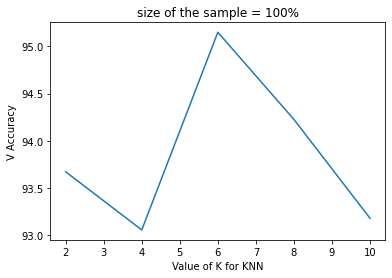

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
n_neighbors = 4
[96.20700245700246, 96.26842751842752, 96.66769041769042, 96.237714987715, 96.42199017199017]
Model training accuracy averaged across 5 folds: 96.3605651105651
Model validation accuracy averaged across 5 folds: 94.26289926289927


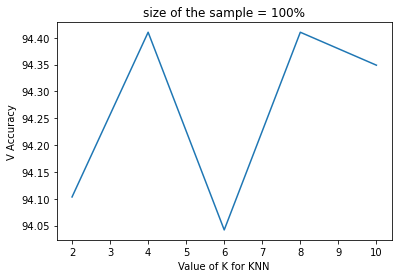

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
n_neighbors = 6
[95.80773955773955, 95.83845208845209, 95.77702702702703, 95.71560196560196, 96.007371007371]
Model training accuracy averaged across 5 folds: 95.82923832923834
Model validation accuracy averaged across 5 folds: 94.22604422604424


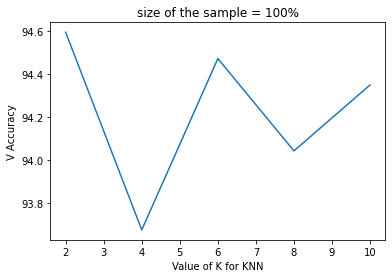

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
n_neighbors = 8
[95.28562653562653, 95.33169533169533, 95.48525798525799, 95.42383292383292, 95.3931203931204]
Model training accuracy averaged across 5 folds: 95.38390663390665
Model validation accuracy averaged across 5 folds: 94.21375921375923


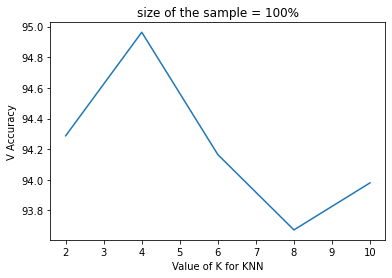

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
n_neighbors = 10
[94.93243243243244, 95.45454545454545, 95.16277641277641, 95.17813267813268, 95.13206388206389]
Model training accuracy averaged across 5 folds: 95.17199017199017
Model validation accuracy averaged across 5 folds: 94.14004914004914


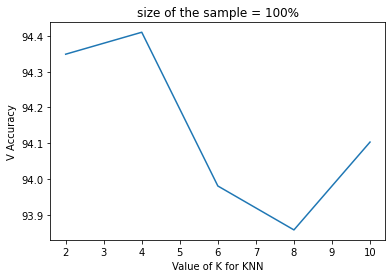

In [29]:
#find the best hyper-parameters
best_knn, model = hyper_parameter_search_knn()

In [31]:
#best hyper-parameters
print (f"Highest validation accuracy with 5-fold: {round(best_knn['acc'])}% with n_neighbors = {best_knn['n_neighbors']}")

Highest accuracy:94% with n_neighbors = 4


## Sample growing

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 20%
n_neighbors = 2
[95.38461538461539, 96.61538461538461, 96.23076923076923, 96.07692307692308, 96.3076923076923]
Model training accuracy averaged across 5 folds: 96.12307692307692
Model validation accuracy averaged across 5 folds: 92.0


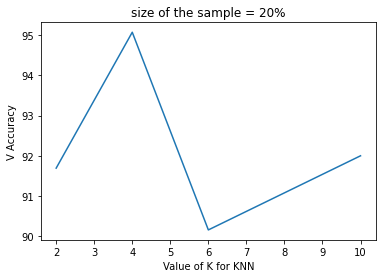

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 40%
n_neighbors = 2
[95.39170506912443, 95.12288786482335, 95.31490015360983, 95.50691244239631, 95.04608294930875]
Model training accuracy averaged across 5 folds: 95.27649769585253
Model validation accuracy averaged across 5 folds: 90.19969278033794


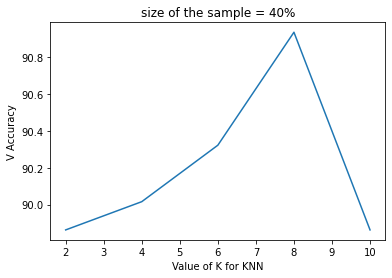

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 60%
n_neighbors = 2
[96.90378710337768, 96.49437052200614, 96.67349027635619, 96.92937563971341, 96.87819856704196]
Model training accuracy averaged across 5 folds: 96.77584442169908
Model validation accuracy averaged across 5 folds: 93.59263050153531


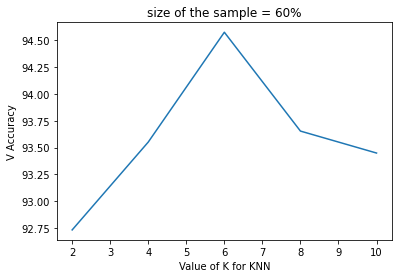

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 80%
n_neighbors = 2
[96.92780337941629, 97.40783410138249, 97.54224270353302, 97.19662058371736, 97.13901689708142]
Model training accuracy averaged across 5 folds: 97.24270353302612
Model validation accuracy averaged across 5 folds: 94.7004608294931


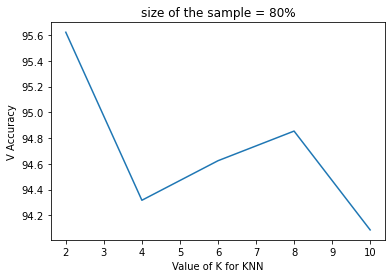

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
n_neighbors = 2
[96.19164619164619, 97.08230958230958, 97.35872235872236, 97.23587223587224, 97.35872235872236]
Model training accuracy averaged across 5 folds: 97.04545454545455
Model validation accuracy averaged across 5 folds: 93.96805896805895


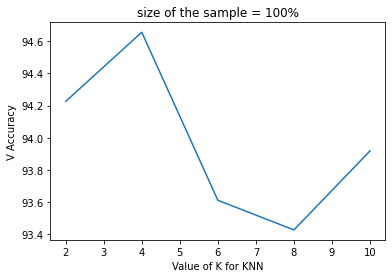

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 20%
n_neighbors = 4
[94.92307692307692, 94.3076923076923, 95.38461538461539, 95.0, 95.76923076923077]
Model training accuracy averaged across 5 folds: 95.07692307692308
Model validation accuracy averaged across 5 folds: 92.49230769230769


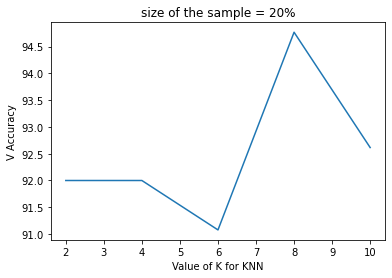

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 40%
n_neighbors = 4
[95.35330261136713, 95.04608294930875, 95.54531490015361, 95.04608294930875, 94.20122887864824]
Model training accuracy averaged across 5 folds: 95.0384024577573
Model validation accuracy averaged across 5 folds: 92.2273425499232


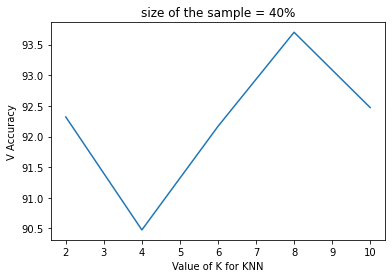

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 60%
n_neighbors = 4
[95.95701125895599, 95.95701125895599, 95.52200614124872, 95.93142272262027, 95.82906857727738]
Model training accuracy averaged across 5 folds: 95.83930399181166
Model validation accuracy averaged across 5 folds: 92.978505629478


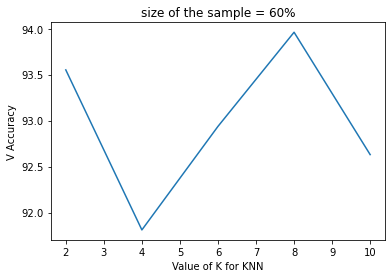

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 80%
n_neighbors = 4
[96.67818740399386, 96.6973886328725, 96.83179723502305, 96.58218125960062, 96.63978494623656]
Model training accuracy averaged across 5 folds: 96.68586789554531
Model validation accuracy averaged across 5 folds: 94.77726574500768


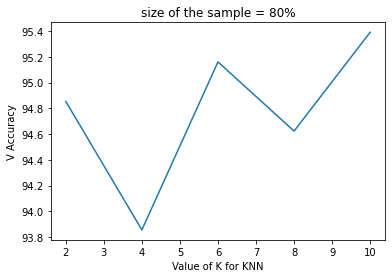

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
n_neighbors = 4
[96.5909090909091, 96.16093366093367, 95.88452088452088, 96.02272727272727, 96.25307125307125]
Model training accuracy averaged across 5 folds: 96.18243243243242
Model validation accuracy averaged across 5 folds: 94.1154791154791


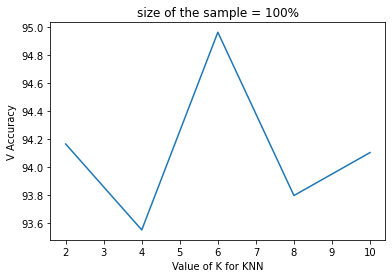

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 20%
n_neighbors = 6
[95.38461538461539, 95.15384615384616, 94.0, 94.92307692307692, 94.23076923076923]
Model training accuracy averaged across 5 folds: 94.73846153846154
Model validation accuracy averaged across 5 folds: 92.55384615384614


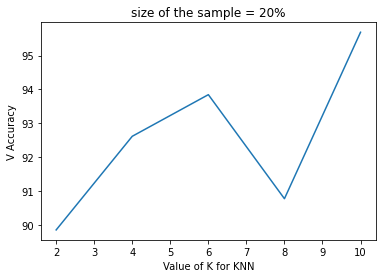

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 40%
n_neighbors = 6
[94.27803379416282, 93.89400921658986, 94.20122887864824, 94.50844854070661, 94.96927803379417]
Model training accuracy averaged across 5 folds: 94.37019969278035
Model validation accuracy averaged across 5 folds: 92.19662058371736


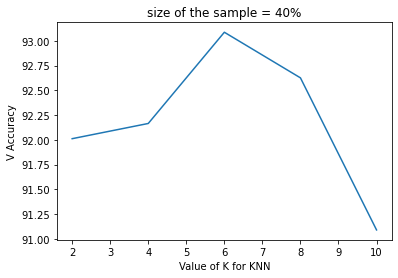

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 60%
n_neighbors = 6
[95.44524053224156, 95.44524053224156, 95.3940634595701, 95.06141248720573, 95.44524053224156]
Model training accuracy averaged across 5 folds: 95.35823950870011
Model validation accuracy averaged across 5 folds: 93.57215967246673


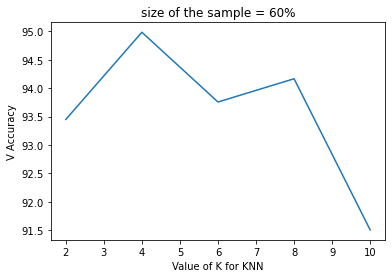

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 80%
n_neighbors = 6
[95.64132104454686, 96.2173579109063, 96.29416282642089, 96.00614439324117, 96.39016897081413]
Model training accuracy averaged across 5 folds: 96.10983102918587
Model validation accuracy averaged across 5 folds: 94.90015360983102


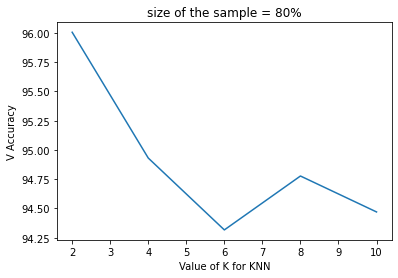

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
n_neighbors = 6
[95.88452088452088, 96.02272727272727, 95.77702702702703, 95.96130221130221, 95.88452088452088]
Model training accuracy averaged across 5 folds: 95.90601965601965
Model validation accuracy averaged across 5 folds: 94.54545454545453


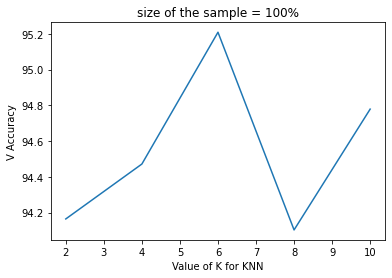

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 20%
n_neighbors = 8
[93.3076923076923, 93.38461538461539, 93.15384615384616, 94.3076923076923, 94.0]
Model training accuracy averaged across 5 folds: 93.63076923076923
Model validation accuracy averaged across 5 folds: 91.63076923076923


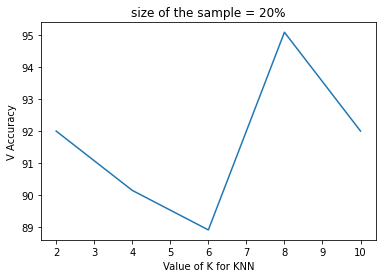

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 40%
n_neighbors = 8
[94.08602150537635, 93.81720430107526, 94.27803379416282, 93.85560675883256, 93.50998463901689]
Model training accuracy averaged across 5 folds: 93.90937019969279
Model validation accuracy averaged across 5 folds: 92.5652841781874


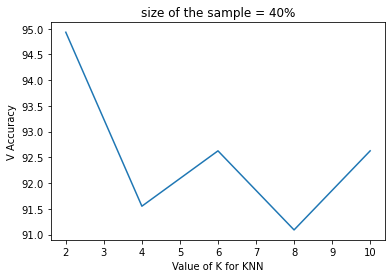

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 60%
n_neighbors = 8
[95.16376663254862, 94.95905834186284, 94.9078812691914, 94.80552712384852, 94.70317297850563]
Model training accuracy averaged across 5 folds: 94.9078812691914
Model validation accuracy averaged across 5 folds: 93.3265097236438


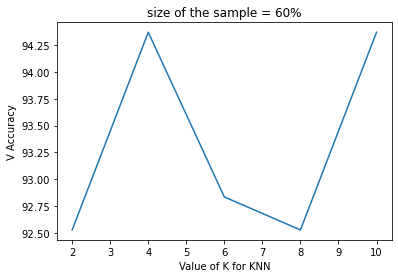

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 80%
n_neighbors = 8
[95.85253456221199, 95.6605222734255, 95.79493087557604, 95.73732718894009, 96.15975422427036]
Model training accuracy averaged across 5 folds: 95.8410138248848
Model validation accuracy averaged across 5 folds: 94.56221198156683


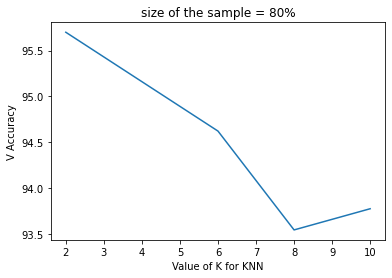

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
n_neighbors = 8
[95.07063882063882, 95.33169533169533, 95.77702702702703, 95.93058968058968, 95.37776412776412]
Model training accuracy averaged across 5 folds: 95.497542997543
Model validation accuracy averaged across 5 folds: 94.48402948402949


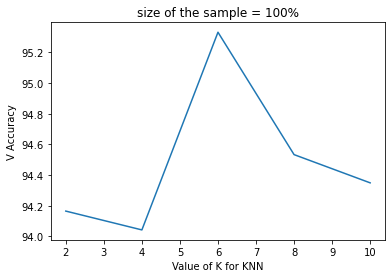

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 20%
n_neighbors = 10
[94.84615384615384, 94.46153846153847, 94.0, 93.46153846153847, 93.3076923076923]
Model training accuracy averaged across 5 folds: 94.01538461538462
Model validation accuracy averaged across 5 folds: 92.73846153846154


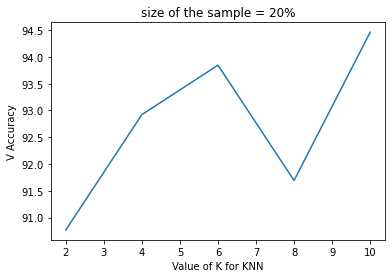

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 40%
n_neighbors = 10
[93.08755760368663, 93.01075268817205, 93.58678955453149, 93.58678955453149, 93.70199692780338]
Model training accuracy averaged across 5 folds: 93.394777265745
Model validation accuracy averaged across 5 folds: 92.10445468509984


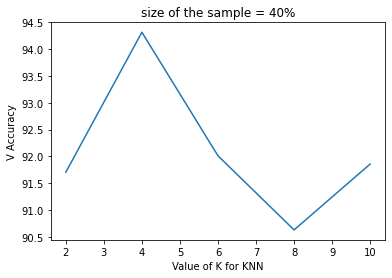

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 60%
n_neighbors = 10
[94.34493346980553, 94.75435005117707, 94.77993858751279, 94.60081883316275, 94.62640736949847]
Model training accuracy averaged across 5 folds: 94.6212896622313
Model validation accuracy averaged across 5 folds: 92.93756397134084


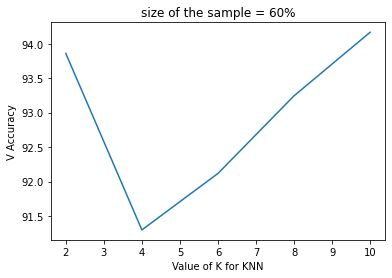

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 80%
n_neighbors = 10
[95.41090629800307, 95.58371735791091, 95.58371735791091, 95.52611367127496, 95.1804915514593]
Model training accuracy averaged across 5 folds: 95.45698924731184
Model validation accuracy averaged across 5 folds: 94.33179723502306


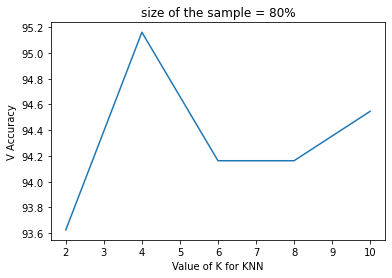

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
n_neighbors = 10
[94.99385749385749, 94.79422604422605, 95.02457002457002, 95.3009828009828, 95.7463144963145]
Model training accuracy averaged across 5 folds: 95.17199017199017
Model validation accuracy averaged across 5 folds: 94.1031941031941


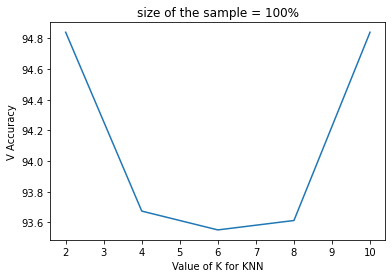

In [32]:
#Sample growing subsets

best_knn_sample, model = hyper_parameter_search_knn(True)

#Best performing model

In [50]:
print(best_knn)

{'size': 100, 'n_neighbors': 4, 'acc': 94.26289926289927}


In [37]:
#using the best hyper-parameters to train on the whole training set
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=4
knn_kw = {
    'n_neighbors': n_neighbors,
}
OH_enc.fit(X_train)
neigh = KNeighborsClassifier(**knn_kw)
neigh.fit(OH_enc.transform(X_train), y_train)

print("Train Accuracy: ", eval_classifier(X_train, y_train, OH_enc, neigh))
print("Test Accuracy: ", eval_classifier(X_test, y_test, OH_enc, neigh))

Train Accuracy:  96.31585410782267
Test Accuracy:  78.64915572232646


### Decision Trees

#Hyper-parameter search

Hyperparameters
- `criterion`: ['gini', 'entropy']
- `max_depth`: [5:20:5]
- `min_samples_split`: [2:6:2]

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

def hyper_parameter_search_tree(growing_samples = False):

    sampling = 10 if growing_samples == False else 2

    best_tree = {
    "size": 0,
    "loss": 'none',
    "max_depth": 0,
    "acc": float('-inf')
        }

    best_model = None 
    k_range = range(2, 12, 2)
    s = occupancy_data.shape[0]
    
    losses =  ['gini', 'entropy']

    for loss in losses:

        for i in range(5,20,5):
            

            scores = []
            for j in range (sampling, 12, 2):
                n_folds = 5
                criterion= loss
                max_depth= i 
                dt_kw = {
                'criterion': criterion,
                'max_depth': max_depth,
                }
                accs_t = []
                accs_v = []
                for batch in tqdm(kfold(occupancy_data.iloc[:int((j/10)*s)], n_folds),total=n_folds):

                    cross_X_train, cross_y_train, cross_X_val, cross_y_val = batch
                    model, acc_train, acc_val = fit_classifier(cross_X_train, cross_y_train, cross_X_val, cross_y_val, OH_enc, DecisionTreeClassifier, **dt_kw)
                    accs_t.append(acc_train)
                    accs_v.append(acc_val)
                print(f"size of the sample = {j*10}%")
                print(f"max_depth = {i}")
                print(accs_v)
                print(f"Model training accuracy averaged across {n_folds} folds: {np.mean(accs_t)}")
                print(f"Model validation accuracy averaged across {n_folds} folds: {np.mean(accs_v)}")
                plt.plot(k_range, accs_v)
                plt.title(f"size of the sample = {j*10}% with {loss} loss")
                plt.xlabel('max_depth')
                plt.ylabel('Accuracy')
                plt.show()

                if(np.mean(accs_v)>best_tree["acc"]):
                    best_tree["size"] = j*10
                    best_tree["loss"] = loss
                    best_tree["max_depth"] = i
                    best_tree['acc'] = np.mean(accs_v)
                    best_model = model




    return best_tree, best_model   

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
max_depth = 5
[85.13513513513513, 84.95085995085995, 84.0909090909091, 85.1965601965602, 84.33660933660934]
Model training accuracy averaged across 5 folds: 85.56203931203932
Model validation accuracy averaged across 5 folds: 84.74201474201473


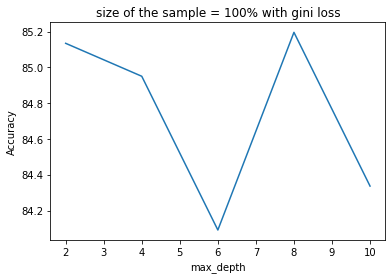

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
max_depth = 10
[88.20638820638821, 88.45208845208845, 87.65356265356266, 89.74201474201475, 88.63636363636364]
Model training accuracy averaged across 5 folds: 88.90663390663391
Model validation accuracy averaged across 5 folds: 88.53808353808355


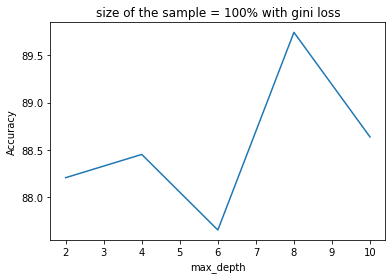

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
max_depth = 15
[90.04914004914005, 90.17199017199017, 90.78624078624078, 90.47911547911548, 91.52334152334153]
Model training accuracy averaged across 5 folds: 91.12714987714988
Model validation accuracy averaged across 5 folds: 90.6019656019656


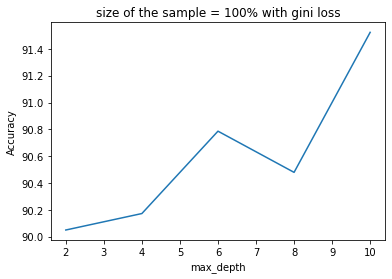

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
max_depth = 5
[86.73218673218673, 84.27518427518427, 85.1965601965602, 87.03931203931204, 84.3980343980344]
Model training accuracy averaged across 5 folds: 85.87530712530713
Model validation accuracy averaged across 5 folds: 85.52825552825553


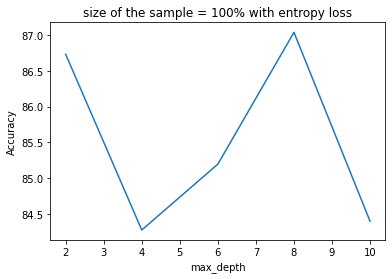

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
max_depth = 10
[87.34643734643734, 88.26781326781327, 87.77641277641278, 87.03931203931204, 87.59213759213759]
Model training accuracy averaged across 5 folds: 87.82248157248158
Model validation accuracy averaged across 5 folds: 87.60442260442261


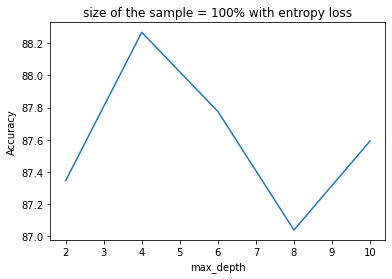

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
max_depth = 15
[90.04914004914005, 90.2948402948403, 89.1891891891892, 88.6977886977887, 90.35626535626535]
Model training accuracy averaged across 5 folds: 90.11363636363635
Model validation accuracy averaged across 5 folds: 89.7174447174447


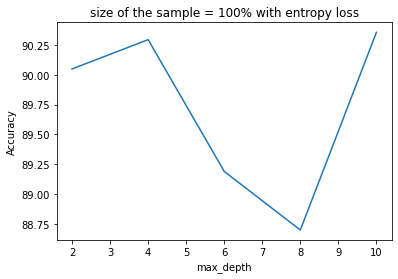

In [47]:
best_tree, model = hyper_parameter_search_tree()

In [48]:
#best hyper-parameters
print (f"Highest validation accuracy with 5-fold: {round(best_tree['acc'])}% with {best_tree['loss']} loss and max_depth of {best_tree['max_depth']}")

Highest accuracy:91% with gini loss and max_depth of 15


#Sample growing

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 20%
max_depth = 5
[97.23076923076923, 94.15384615384616, 97.23076923076923, 96.61538461538461, 97.84615384615384]
Model training accuracy averaged across 5 folds: 97.44615384615385
Model validation accuracy averaged across 5 folds: 96.61538461538461


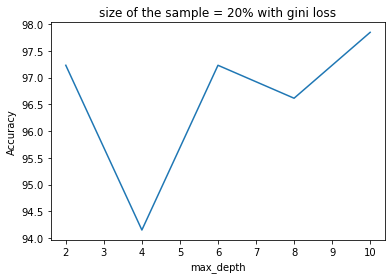

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 40%
max_depth = 5
[96.62058371735792, 96.92780337941629, 97.08141321044546, 97.23502304147465, 97.38863287250383]
Model training accuracy averaged across 5 folds: 97.48847926267283
Model validation accuracy averaged across 5 folds: 97.05069124423963


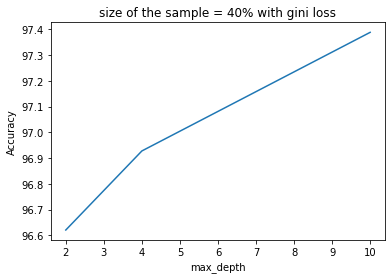

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 60%
max_depth = 5
[87.41044012282498, 88.12691914022518, 87.41044012282498, 87.92221084953941, 88.7410440122825]
Model training accuracy averaged across 5 folds: 88.31627430910952
Model validation accuracy averaged across 5 folds: 87.92221084953941


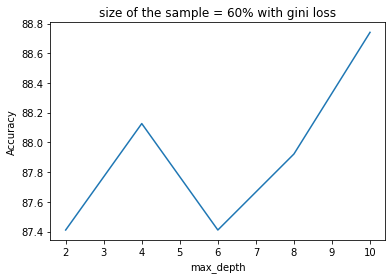

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 80%
max_depth = 5
[88.32565284178187, 89.78494623655914, 88.78648233486943, 88.0184331797235, 87.48079877112136]
Model training accuracy averaged across 5 folds: 88.5215053763441
Model validation accuracy averaged across 5 folds: 88.47926267281107


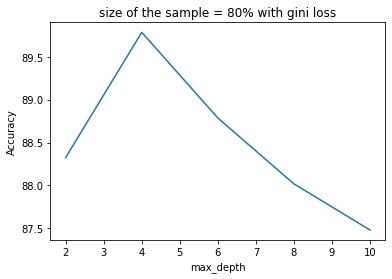

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
max_depth = 5
[84.95085995085995, 84.45945945945945, 84.45945945945945, 85.07371007371007, 85.1965601965602]
Model training accuracy averaged across 5 folds: 85.4115479115479
Model validation accuracy averaged across 5 folds: 84.82800982800983


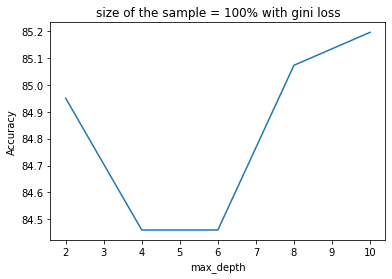

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 20%
max_depth = 10
[97.23076923076923, 96.92307692307692, 96.3076923076923, 98.76923076923077, 96.61538461538461]
Model training accuracy averaged across 5 folds: 98.58461538461538
Model validation accuracy averaged across 5 folds: 97.16923076923077


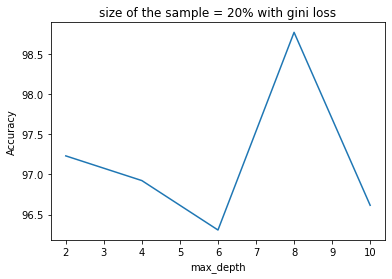

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 40%
max_depth = 10
[97.23502304147465, 96.31336405529954, 97.6958525345622, 98.15668202764977, 97.08141321044546]
Model training accuracy averaged across 5 folds: 98.19508448540707
Model validation accuracy averaged across 5 folds: 97.29646697388634


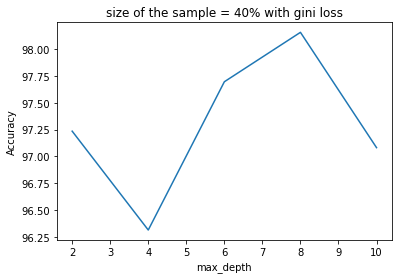

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 60%
max_depth = 10
[90.2763561924258, 88.53633572159673, 90.07164790174002, 88.43398157625384, 89.25281473899693]
Model training accuracy averaged across 5 folds: 89.89252814738998
Model validation accuracy averaged across 5 folds: 89.31422722620266


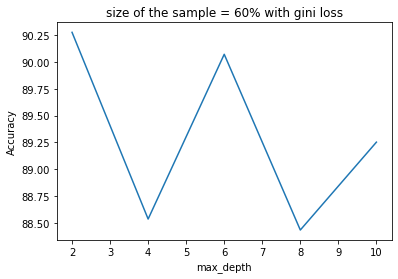

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 80%
max_depth = 10
[90.78341013824885, 92.08909370199693, 90.86021505376344, 92.01228878648233, 91.2442396313364]
Model training accuracy averaged across 5 folds: 91.85867895545314
Model validation accuracy averaged across 5 folds: 91.3978494623656


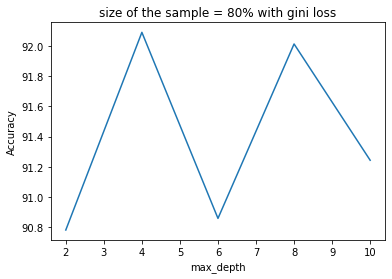

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
max_depth = 10
[88.6977886977887, 88.08353808353809, 88.82063882063882, 89.43488943488944, 87.46928746928747]
Model training accuracy averaged across 5 folds: 88.92506142506143
Model validation accuracy averaged across 5 folds: 88.5012285012285


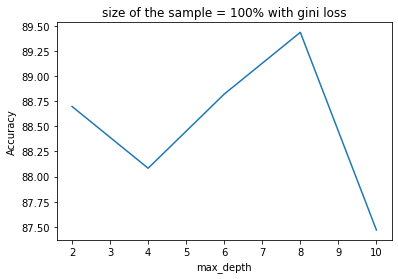

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 20%
max_depth = 15
[94.76923076923077, 98.15384615384616, 97.84615384615384, 96.61538461538461, 96.3076923076923]
Model training accuracy averaged across 5 folds: 99.2
Model validation accuracy averaged across 5 folds: 96.73846153846154


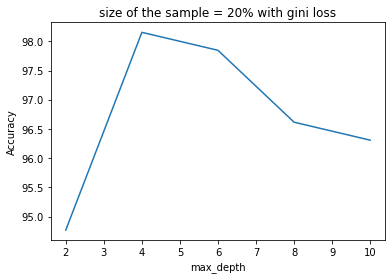

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 40%
max_depth = 15
[97.6958525345622, 97.54224270353302, 97.54224270353302, 97.38863287250383, 97.38863287250383]
Model training accuracy averaged across 5 folds: 98.6021505376344
Model validation accuracy averaged across 5 folds: 97.51152073732717


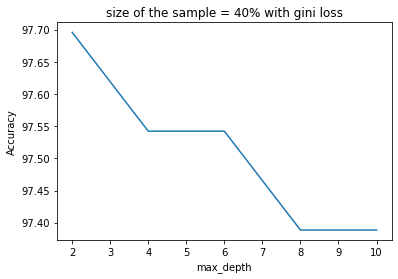

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 60%
max_depth = 15
[87.92221084953941, 90.58341862845445, 88.84339815762539, 90.2763561924258, 87.71750255885364]
Model training accuracy averaged across 5 folds: 90.70112589559878
Model validation accuracy averaged across 5 folds: 89.06857727737973


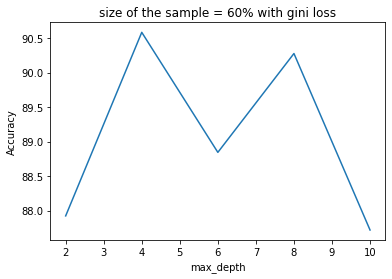

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 80%
max_depth = 15
[92.78033794162826, 93.01075268817205, 92.01228878648233, 91.93548387096774, 92.85714285714286]
Model training accuracy averaged across 5 folds: 93.49462365591398
Model validation accuracy averaged across 5 folds: 92.51920122887864


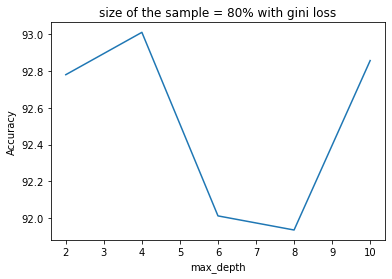

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
max_depth = 15
[89.86486486486487, 92.07616707616708, 91.15479115479116, 90.35626535626535, 91.89189189189189]
Model training accuracy averaged across 5 folds: 91.72297297297298
Model validation accuracy averaged across 5 folds: 91.06879606879606


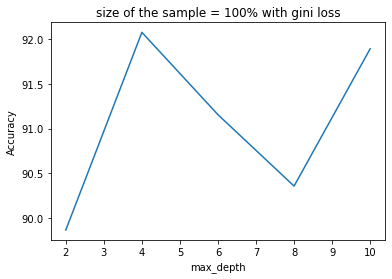

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 20%
max_depth = 5
[97.53846153846153, 95.38461538461539, 96.61538461538461, 96.0, 97.84615384615384]
Model training accuracy averaged across 5 folds: 97.44615384615385
Model validation accuracy averaged across 5 folds: 96.67692307692307


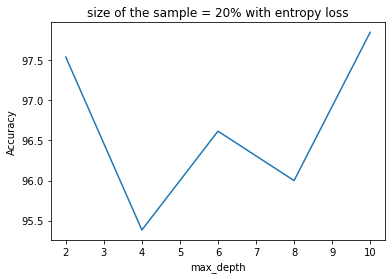

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 40%
max_depth = 5
[96.92780337941629, 97.23502304147465, 96.92780337941629, 97.08141321044546, 97.38863287250383]
Model training accuracy averaged across 5 folds: 97.49615975422428
Model validation accuracy averaged across 5 folds: 97.11213517665131


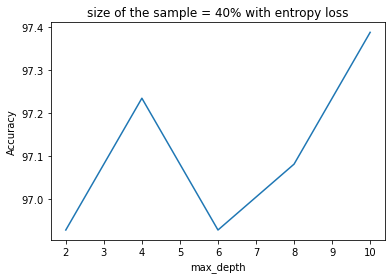

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 60%
max_depth = 5
[87.3080859774821, 87.92221084953941, 88.53633572159673, 86.79631525076766, 87.61514841351075]
Model training accuracy averaged across 5 folds: 87.78915046059365
Model validation accuracy averaged across 5 folds: 87.63561924257934


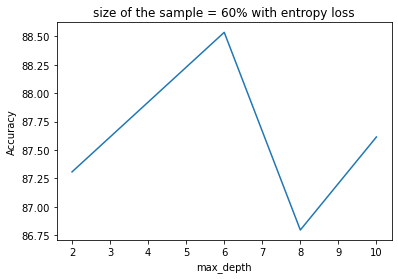

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 80%
max_depth = 5
[87.17357910906298, 86.78955453149001, 89.17050691244239, 89.0937019969278, 89.32411674347158]
Model training accuracy averaged across 5 folds: 88.47542242703533
Model validation accuracy averaged across 5 folds: 88.31029185867895


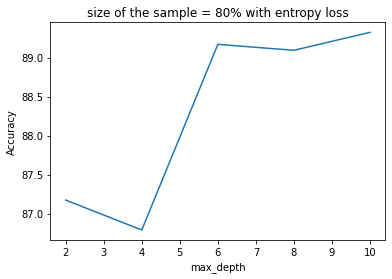

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
max_depth = 5
[84.8894348894349, 83.53808353808354, 86.05651105651106, 84.45945945945945, 85.5036855036855]
Model training accuracy averaged across 5 folds: 85.5497542997543
Model validation accuracy averaged across 5 folds: 84.8894348894349


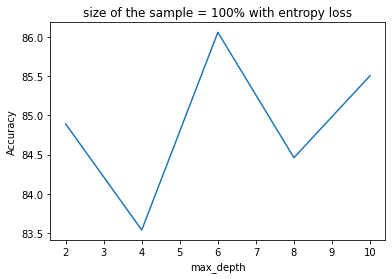

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 20%
max_depth = 10
[97.23076923076923, 97.53846153846153, 94.76923076923077, 96.61538461538461, 96.61538461538461]
Model training accuracy averaged across 5 folds: 98.61538461538461
Model validation accuracy averaged across 5 folds: 96.55384615384617


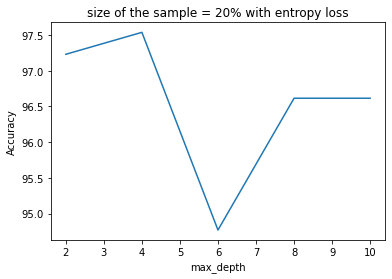

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 40%
max_depth = 10
[96.92780337941629, 97.23502304147465, 97.84946236559139, 97.38863287250383, 96.92780337941629]
Model training accuracy averaged across 5 folds: 98.20276497695852
Model validation accuracy averaged across 5 folds: 97.2657450076805


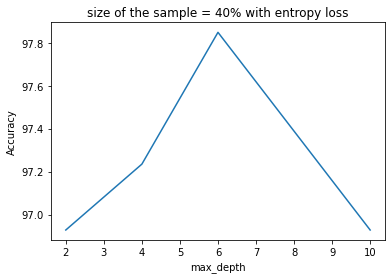

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 60%
max_depth = 10
[85.77277379733879, 85.77277379733879, 88.53633572159673, 89.86693961105425, 88.7410440122825]
Model training accuracy averaged across 5 folds: 88.97645854657114
Model validation accuracy averaged across 5 folds: 87.73797338792221


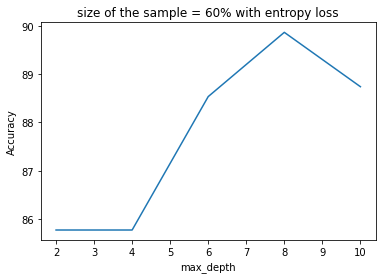

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 80%
max_depth = 10
[90.3225806451613, 91.09062980030723, 92.16589861751152, 92.08909370199693, 90.47619047619048]
Model training accuracy averaged across 5 folds: 91.70506912442394
Model validation accuracy averaged across 5 folds: 91.22887864823349


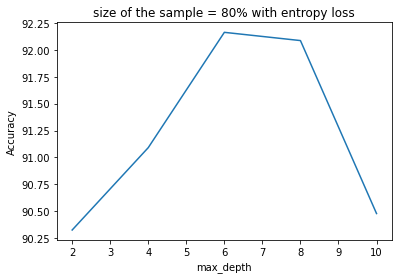

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
max_depth = 10
[85.87223587223588, 87.53071253071253, 87.83783783783784, 86.97788697788698, 87.77641277641278]
Model training accuracy averaged across 5 folds: 87.89004914004913
Model validation accuracy averaged across 5 folds: 87.19901719901722


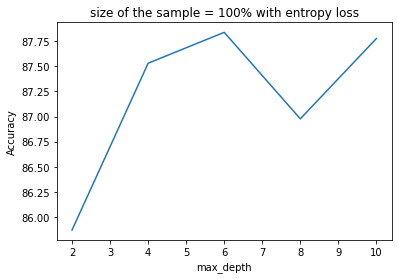

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 20%
max_depth = 15
[97.53846153846153, 97.53846153846153, 97.23076923076923, 96.92307692307692, 95.38461538461539]
Model training accuracy averaged across 5 folds: 99.47692307692307
Model validation accuracy averaged across 5 folds: 96.9230769230769


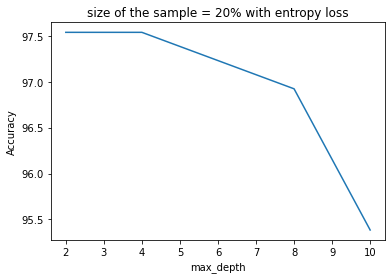

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 40%
max_depth = 15
[97.38863287250383, 97.6958525345622, 97.23502304147465, 98.46390168970814, 96.62058371735792]
Model training accuracy averaged across 5 folds: 98.63287250384026
Model validation accuracy averaged across 5 folds: 97.48079877112134


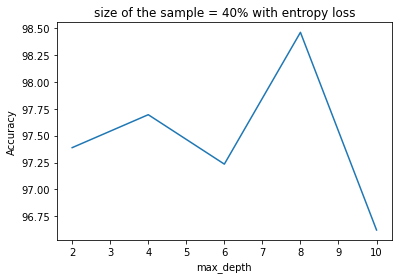

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 60%
max_depth = 15
[89.96929375639714, 90.07164790174002, 90.2763561924258, 88.94575230296827, 88.33162743091096]
Model training accuracy averaged across 5 folds: 90.15864892528148
Model validation accuracy averaged across 5 folds: 89.51893551688843


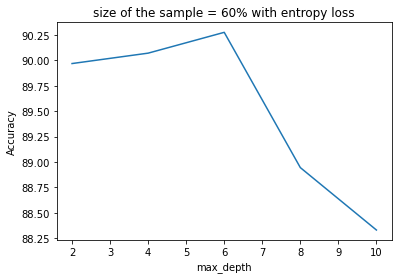

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 80%
max_depth = 15
[91.321044546851, 93.16436251920123, 93.70199692780338, 91.85867895545314, 91.47465437788019]
Model training accuracy averaged across 5 folds: 92.8110599078341
Model validation accuracy averaged across 5 folds: 92.30414746543778


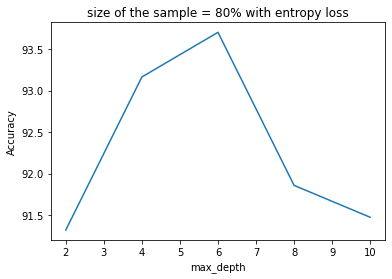

  0%|          | 0/5 [00:00<?, ?it/s]

size of the sample = 100%
max_depth = 15
[89.987714987715, 89.31203931203932, 89.12776412776412, 89.25061425061425, 89.37346437346437]
Model training accuracy averaged across 5 folds: 89.95700245700246
Model validation accuracy averaged across 5 folds: 89.4103194103194


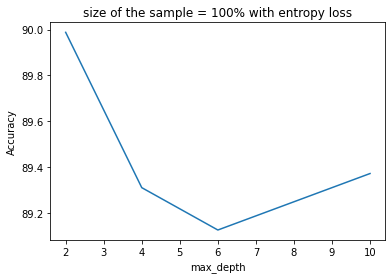

In [49]:
#Sample growing subsets

best_knn_sample, model = hyper_parameter_search_tree(growing_samples=True)

#Best model

In [51]:
print(best_tree)

{'size': 100, 'loss': 'gini', 'max_depth': 15, 'acc': 90.6019656019656}


In [53]:
#using the best hyper-parameters to train on the whole training set

from sklearn.tree import DecisionTreeClassifier
criterion='gini'
max_depth=5
dt_kw = {
    'criterion': criterion,
    'max_depth': max_depth,
}
OH_enc.fit(X_train)
classifier = DecisionTreeClassifier(**dt_kw)
classifier.fit(OH_enc.transform(X_train), y_train)

print("Train Accuracy: ", eval_classifier(X_train, y_train, OH_enc, classifier))
print("Test Accuracy: ", eval_classifier(X_test, y_test, OH_enc, classifier))

Train Accuracy:  85.23885545867617
Test Accuracy:  68.81801125703565
